# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [8]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

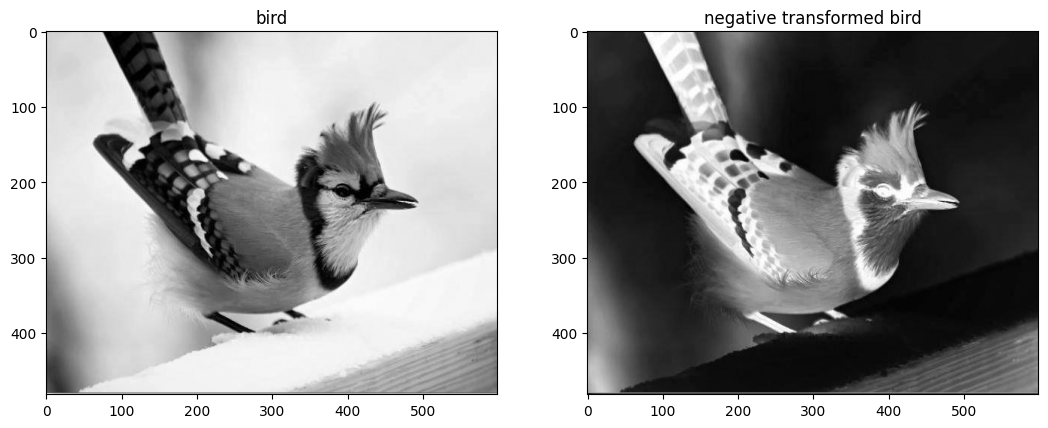

In [10]:
'''
1
Negative Transformation
'''
bird = io.imread('imgs/bird.jpg')
bird_gray = rgb2gray(bird)
bird_negative = 255 - bird_gray
show_images([bird_gray, bird_negative], ['bird', 'negative transformed bird'])


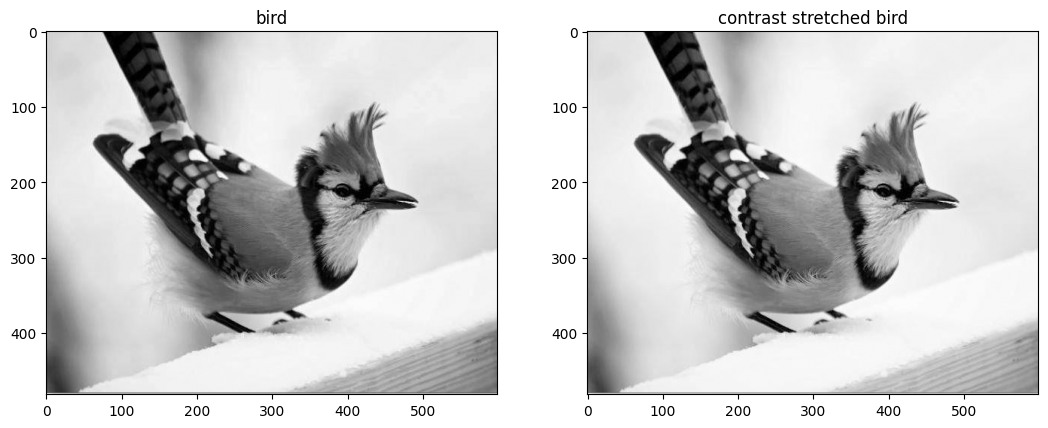

In [15]:
'''
2
Contrast Enhancement
'''
C_CONTRAST = 1
bird_contrast_stretched = C_CONTRAST * np.log1p(bird_gray)
show_images([bird_gray, bird_contrast_stretched], ['bird', 'contrast stretched bird'])

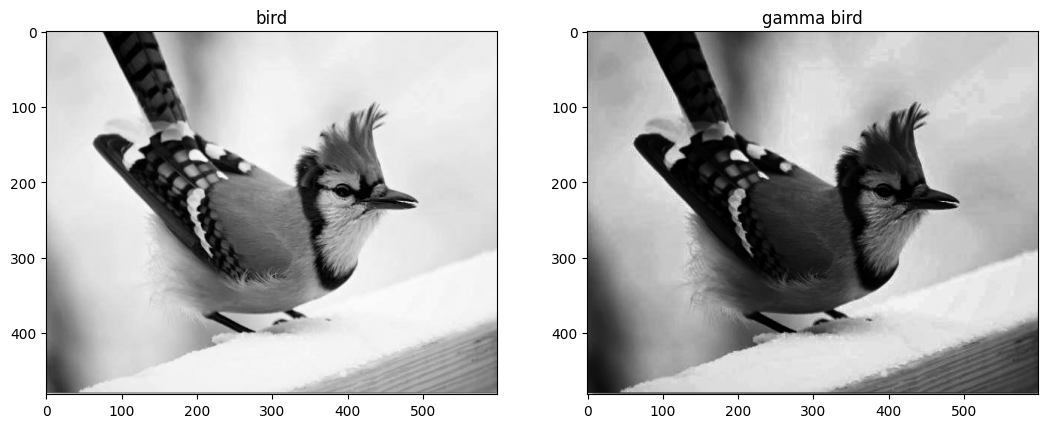

In [ ]:
'''
3
Gamma Correction
'''
GAMMA = 2.5
C_GAMMA = 1
bird_gamma = C_GAMMA * np.exp(GAMMA * bird_gray)
show_images([bird_gray, bird_gamma], ['bird', 'gamma bird'])

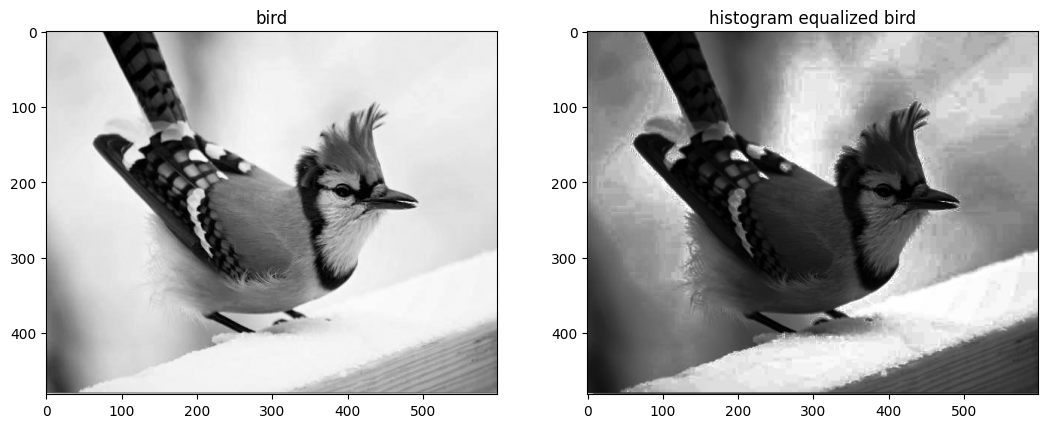

In [13]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
###### Not Sure if this is correct ######
from skimage.exposure import equalize_hist

def getImageWithHist(name,ext,nbins=256):
    img = io.imread(name + "." + ext)
    img_gray = rgb2gray(img)

    img_eq = equalize_hist(img_gray, nbins=nbins)
    return img_eq

img_eq = getImageWithHist('imgs/bird','jpg')
show_images([bird_gray, img_eq], ['bird', 'histogram equalized bird'])
